In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats #scipy = scientific python
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid",context="notebook")
plt.rcParams['figure.figsize']=(10,5)


In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape

(891, 12)

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
# check % of missing data
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['Column', 'Missing_Values']
missing_df['Missing_Percent']=(missing_df['Missing_Values']/ len(df))* 100
missing_df.sort_values(by='Missing_Percent',ascending=False)

,Column,Missing_Values,Missing_Percent
10,Cabin,687,77.104377
5,Age,177,19.865320
11,Embarked,2,0.224467
0,PassengerId,0,0.000000
3,Name,0,0.000000
2,Pclass,0,0.000000
1,Survived,0,0.000000
4,Sex,0,0.000000
7,Parch,0,0.000000
6,SibSp,0,0.000000


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


In [ ]:
# Target variable analysis
df['Survived'].value_counts(normalize=True)*100

,proportion
Survived,
0,61.616162
1,38.383838


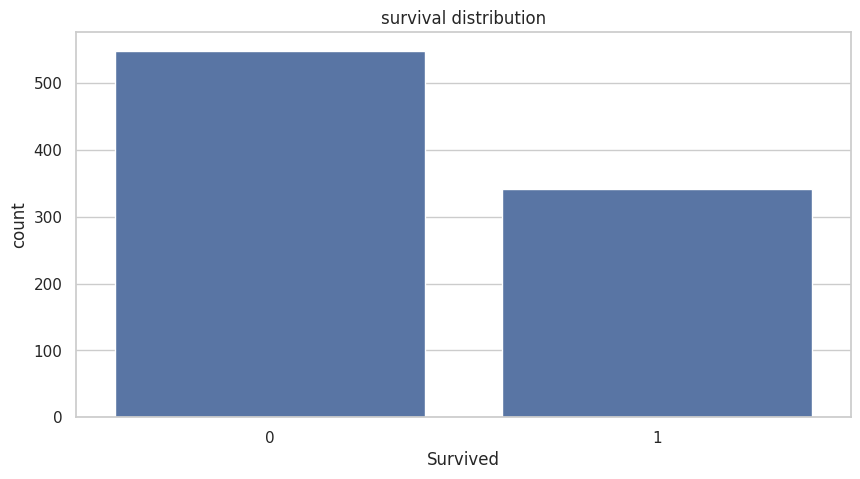

In [ ]:
sns.countplot(x='Survived', data=df)
plt.title("survival distribution")
plt.show()

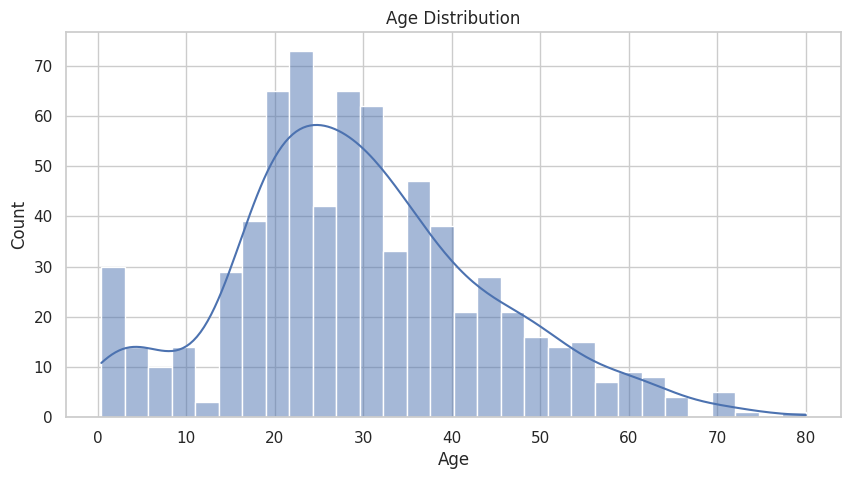

In [ ]:
# Univariate Analysis
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

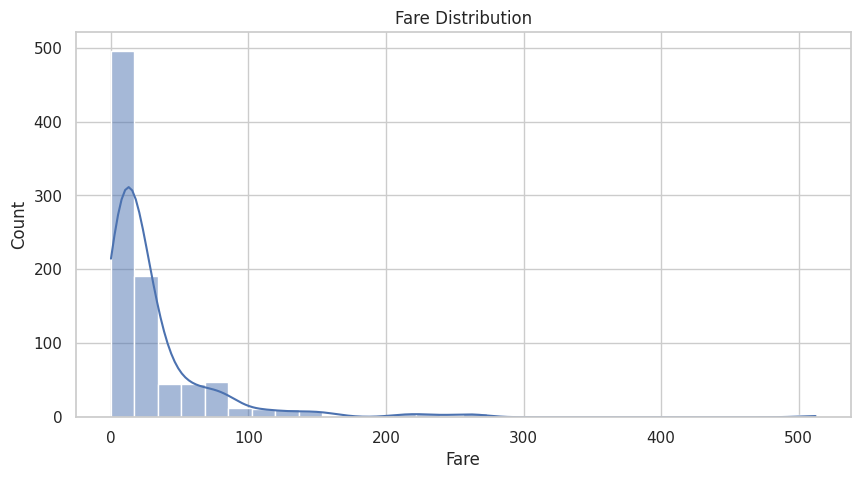

In [ ]:
# Fare Distribution
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

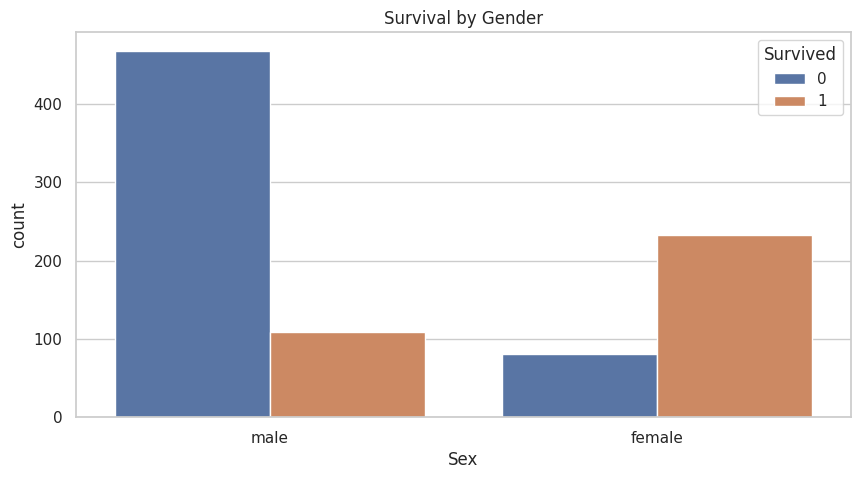

In [ ]:
# categorical variable analysis
# gender vs survival
sns.countplot(x= 'Sex', hue= 'Survived', data=df)
plt.title("Survival by Gender")
plt.show()


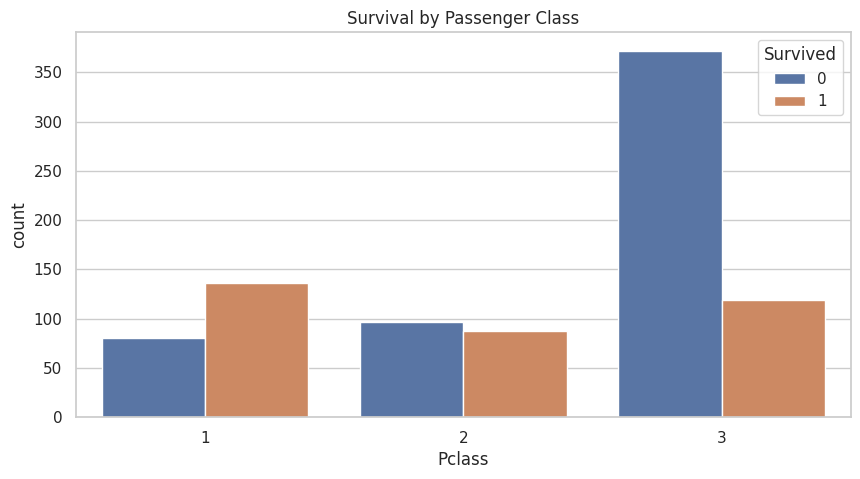

In [ ]:
#P class vs survival
sns.countplot(x= 'Pclass', hue= 'Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

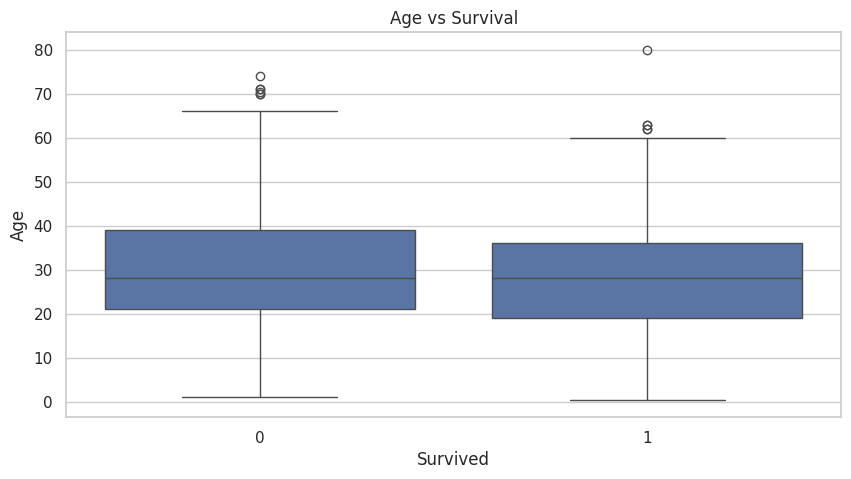

In [ ]:
# Bivarient
# Age vs survival
sns.boxplot(x= 'Survived', y = 'Age', data=df)
plt.title("Age vs Survival")
plt.show()

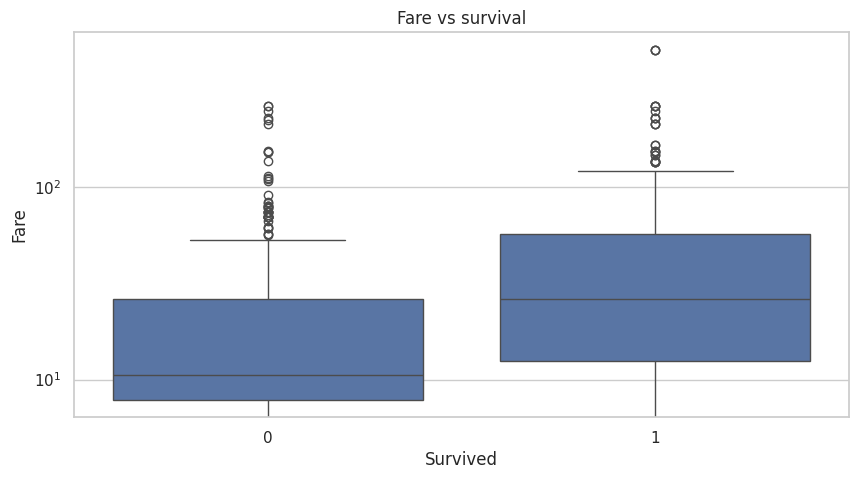

In [ ]:
from logging import log
# Fare vs survival
sns.boxplot(x ='Survived', y='Fare', data=df)
plt.yscale('log')
plt.title("Fare vs survival")
plt.show()

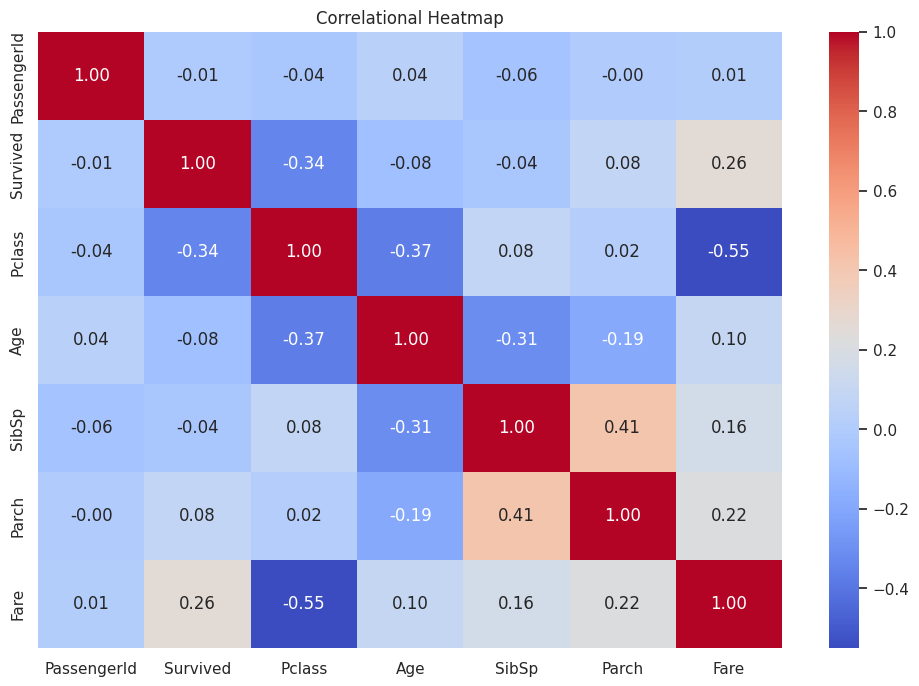

In [ ]:
# co-relation analysis
numeric_df = df.select_dtypes(include=['int64','float64'])

corr= numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlational Heatmap")
plt.show()

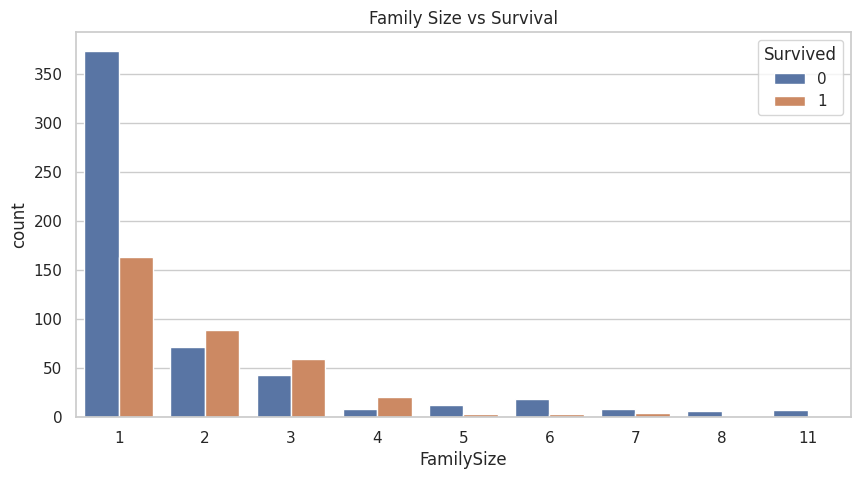

In [ ]:
# Feature Engineering
# Family size
df['FamilySize']= df['SibSp']+df['Parch']+1
sns.countplot(x='FamilySize',hue='Survived', data=df)
plt.title("Family Size vs Survival")
plt.show()

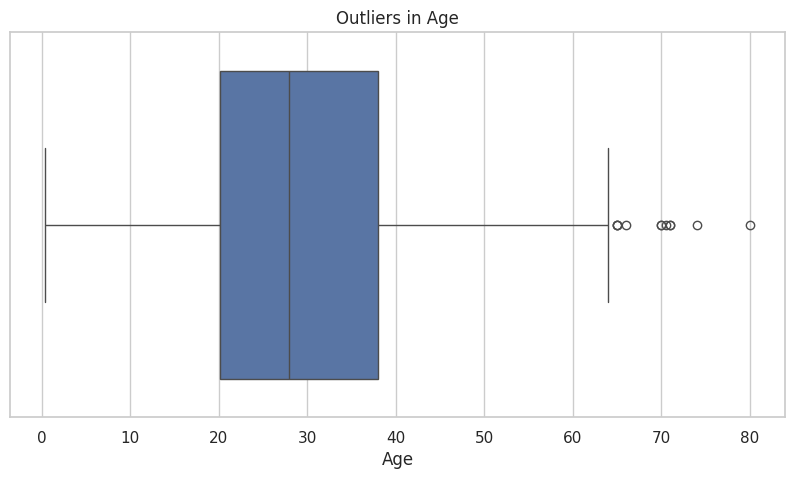

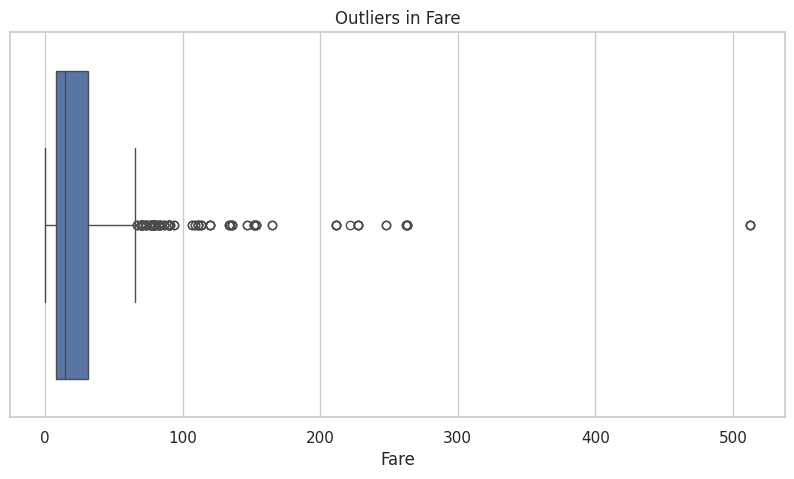

In [ ]:
#Outlier detection
for col in ['Age', 'Fare']:
  sns.boxplot(x=df[col])
  plt.title(f"Outliers in {col}")
  plt.show()

In [ ]:
# Z score
z_scores = np.abs(stats.zscore(df[['Age','Fare']].dropna()))
outliers= (z_scores >3).sum(axis=0)
outliers

array([ 2, 18])

In [ ]:
# EDA summary
eda_summary ={
    "Total Rows": df.shape[0],
    "Total Columns": df.shape[1],
    "Missing Columns": missing_df[missing_df['Missing_Values']>0]['Column'].tolist(),
    "Target Balance(%)": df['Survived'].value_counts(normalize=True).to_dict(),
    "Highly Correlated Features" : corr[corr>0.7].stack().index.tolist()
}
eda_summary

{'Total Rows': 891,
 'Total Columns': 13,
 'Missing Columns': ['Age', 'Cabin', 'Embarked'],
 'Target Balance(%)': {0: 0.6161616161616161, 1: 0.3838383838383838},
 'Highly Correlated Features': [('PassengerId', 'PassengerId'),
  ('Survived', 'Survived'),
  ('Pclass', 'Pclass'),
  ('Age', 'Age'),
  ('SibSp', 'SibSp'),
  ('Parch', 'Parch'),
  ('Fare', 'Fare')]}

In [ ]:
print(df.duplicated().sum())